##
 --> explain stake-size effect with attention/fixation 

Sanity check?? 
- check match to behavior again (yes! - sub-01, key presses in eyetrack_messages & symbolic_events align)

--> last fixation inlfuences choice most (in positive or negative way - stake size ?!)

- saccades
- fixation times
- look at risky option more?
- DD only focus on one option (risky or save....)


- duration_option_dif_abs ~ stake-size effect ? (outliers?)

In [1]:
#from riskeye.utils.data import get_all_behavior, get_all_eyepos_info, get_all_subjects, Subject
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = op.join(bids_folder, 'plots_and_ims', 'eyetracking')


In [4]:
from utils import get_behavior
df_behav = get_behavior()
df_behav = df_behav.xs(1,0,'session').xs('symbolic',0,'format')


In [67]:
# df = get_all_behavior(include_eyedata=True) does not work yet... 

summarized_fixations = pd.read_csv(op.join(bids_folder,'derivatives/pupil/group_source-saccades_fixations_summary.tsv'), sep='\t')
summarized_fixations['trial_nr'] = summarized_fixations['trial'].astype(int)
summarized_fixations.set_index(['subject','trial_nr'], inplace=True)

df = df_behav.join(summarized_fixations)
df['n_saccades'] = df['n_saccades'].where((df['n_saccades'] < 9), np.nan) # remove outliers
# drop there rows!
df = df.dropna(subset=['n_saccades'])

In [69]:
df['n_right'] = df['n1']
df['n_left'] = df['n2']
df['p_right'] = df['prob1']
df['p_left'] = df['prob2']

df['n1'] = df['n_left'].where(df['first_saccade'] == 'left_option', df['n_right'])
df['p1'] = df['p_left'].where(df['first_saccade'] == 'left_option', df['p_right'])
df['n2'] = df['n_left'].where(df['first_saccade'] == 'right_option', df['n_right'])
df['p2'] = df['p_left'].where(df['first_saccade'] == 'right_option', df['p_right'])

In [70]:
df['last_saccade_risky'] = (df['last_saccade'] == 'left_option') & (df['risky_left'])
df['last_saccade_safe'] = (~df['last_saccade_risky'])

df['first_saccade_risky'] = (df['first_saccade'] == 'left_option') & (df['risky_left'])
df['first_saccade_safe'] = (~df['first_saccade_risky'])

df['first_saccade_left'] = (df['first_saccade'] == 'left_option')
df['last_saccade_left'] = (df['first_saccade'] == 'left_option') 


In [71]:
sns.set_context('talk')

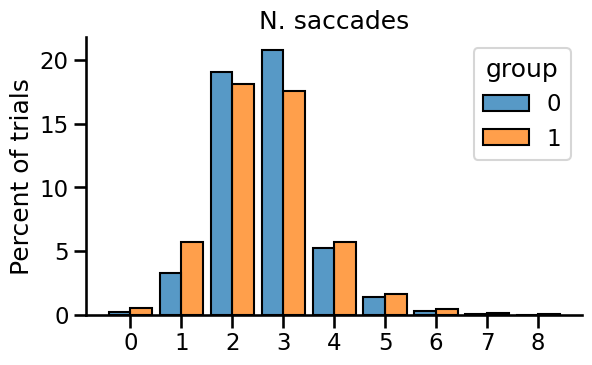

In [72]:
p = sns.histplot(data=df.reset_index(), hue = 'group', x='n_saccades', 
                 bins=np.arange(-.5, 9.5, 1), multiple="dodge", shrink=.85, stat='percent',
                legend=True)
p.set_ylabel('Percent of trials')
p.set_title('N. saccades')
p.set_xlabel(None)
p.set_xticks(np.arange(0, 9))

p.set_aspect(1/4.)
sns.despine()


/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/974743361.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.swarmplot(x='group', hue='group', y='n_saccades', data=df.reset_index().groupby(['subject']).mean().reset_index(),
/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/974743361.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pairwise_ttests(df.reset_index().groupby(['subject']).mean().reset_index(), dv='n_saccades', between='group')
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is depre

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,group,0.0,1.0,False,True,0.588424,64.0,two-sided,0.558319,0.292,0.143156


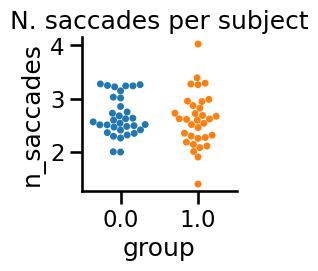

In [73]:
fig, ax = plt.subplots(figsize=(2,2))
sns.swarmplot(x='group', hue='group', y='n_saccades', data=df.reset_index().groupby(['subject']).mean().reset_index(),
                   legend=False, ax=ax, size=5)
sns.despine()
plt.title('N. saccades per subject')

from pingouin import pairwise_ttests
pairwise_ttests(df.reset_index().groupby(['subject']).mean().reset_index(), dv='n_saccades', between='group')

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/916301465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject']).mean()


Text(0.5, 1.15, 'Saccade left direction')

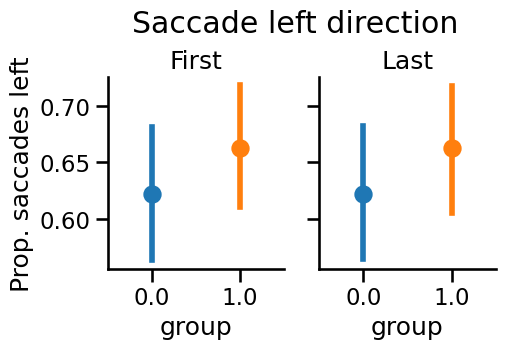

In [74]:
tmp = df.groupby(['subject']).mean()

fig, axs = plt.subplots(1, 2, figsize=(5,2.5), sharey=True)
sns.pointplot(data=tmp.reset_index(), x='group', y='first_saccade_left', hue='group', ax=axs[0],legend=False)
axs[0].set_title('First')
axs[0].set_ylabel('Prop. saccades left')
sns.pointplot(data=tmp.reset_index(), x='group', y='last_saccade_left', hue='group', ax=axs[1],legend=False)
axs[1].set_title('Last')
sns.despine()
fig.suptitle('Saccade left direction', y=1.15)

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/2707927297.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject']).mean()


Text(0.5, 1.15, 'Saccade risky option')

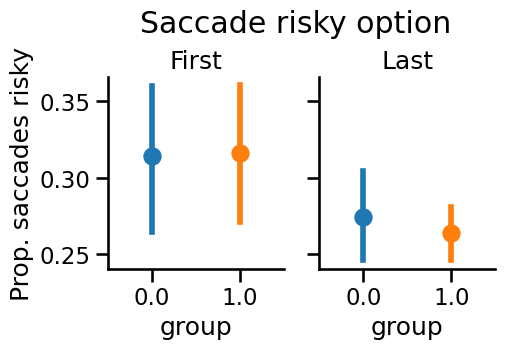

In [75]:
tmp = df.groupby(['subject']).mean()

fig, axs = plt.subplots(1, 2, figsize=(5,2.5), sharey=True)

sns.pointplot(data=tmp.reset_index(), x='group', y='last_saccade_risky', hue='group', ax=axs[1],legend=False)
axs[1].set_title('Last')
axs[0].set_ylabel('Prop. saccades risky')
sns.pointplot(data=tmp.reset_index(), x='group', y='first_saccade_risky', hue='group', ax=axs[0],legend=False)
axs[0].set_title('First')
sns.despine()
fig.suptitle('Saccade risky option', y=1.15)

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/3664233318.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject']).mean()
/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/3664233318.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject','first_saccade_risky' ]).mean()
/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/3664233318.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or s

Text(0.5, 1.15, 'Saccade risky option')

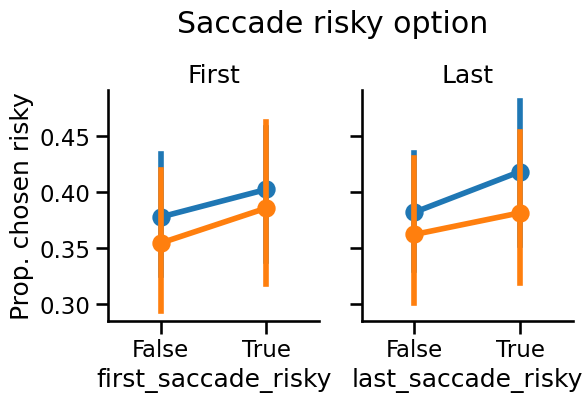

In [76]:
y_var = 'chose_risky'
tmp = df.groupby(['subject']).mean()

fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

tmp = df.groupby(['subject','first_saccade_risky' ]).mean()
sns.pointplot(data=tmp.reset_index(), x='first_saccade_risky', y=y_var, hue='group', ax=axs[0],legend=False)
axs[0].set_title('First')
axs[0].set_ylabel('Prop. chosen risky')
tmp = df.groupby(['subject','last_saccade_risky' ]).mean()
sns.pointplot(data=tmp.reset_index(), x='last_saccade_risky', y=y_var, hue='group', ax=axs[1],legend=False)
axs[1].set_title('Last')
sns.despine()
fig.suptitle('Saccade risky option', y=1.15)

In [77]:
df.head()

choice    n1    n2  prob1  prob2  risky_left  chose_risky  \
subject trial_nr                                                              
13      1            2.0   7.0  14.0   0.55    1.0        True        False   
        2            1.0  28.0  79.0   0.55    1.0        True         True   
        3            1.0   7.0  28.0   0.55    1.0        True         True   
        4            2.0  20.0  40.0   0.55    1.0        True        False   
        6            2.0   5.0   5.0   0.55    1.0        True        False   

                  n_risky  n_safe      frac  ...  p_right  p_left   p1    p2  \
subject trial_nr                             ...                               
13      1            14.0     7.0  2.000000  ...     0.55     1.0  1.0  0.55   
        2            79.0    28.0  2.821429  ...     0.55     1.0  1.0  0.55   
        3            28.0     7.0  4.000000  ...     0.55     1.0  1.0  0.55   
        4            40.0    20.0  2.000000  ...     0.55     1.0  1.0  0.55   
        6             5.0     5.0  1.000000  ...     0.55     1.0  1.0  0.55   

                  last_saccade_risky  last_saccade_safe first_saccade_risky  \
subject trial_nr                                                              
13      1                       True              False                True   
        2                       True              False                True   
        3                       True              False                True   
        4                      False               True                True   
        6                       True              False                True   

                 first_saccade_safe  first_saccade_left  last_saccade_left  
subject trial_nr                                                            
13      1                     False                True               True  
        2                     False                True               True  
        3                     False                True               True  
        4                     False                True               True  
        6                     False                True               True  

[5 rows x 32 columns]

In [78]:
# did they chose the option they last looked at?
df['last_saccade_chose'] = df['last_saccade'].where(df['last_saccade'] == df['chosen_option'], np.nan)

KeyError: 'chosen_option'

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/1237530582.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject',x_var ]).mean()


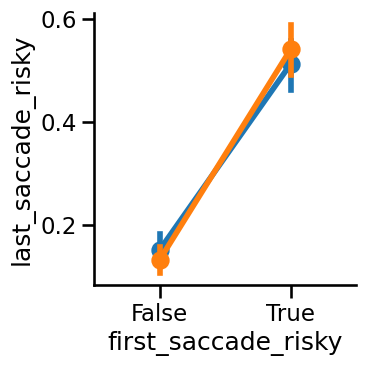

In [79]:
x_var = 'first_saccade_risky'
y_var = 'last_saccade_risky'

tmp = df.groupby(['subject',x_var ]).mean()


sns.catplot(tmp.reset_index(), y=y_var, x=x_var, hue='group',kind='point',height=4, aspect=1, legend=False)

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/4092603973.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', col_var,x_var ]).mean()


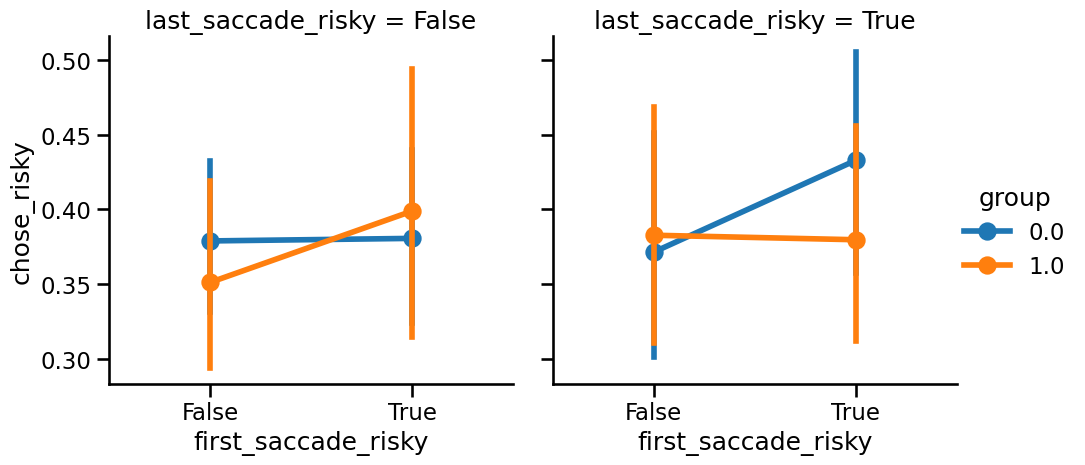

In [80]:
x_var = 'first_saccade_risky'#'log(risky/safe)' #'n_risky'
col_var = 'last_saccade_risky'
tmp = df.groupby(['subject', col_var,x_var ]).mean()

sns.catplot(tmp.reset_index(), y='chose_risky', x= x_var, col=col_var, hue='group',kind='point')

--> for dyscalculics first_saccade more important, for controls last saccade?

In [109]:
df.head()

choice    n1    n2  prob1  prob2  risky_left  chose_risky  \
subject trial_nr                                                              
13      1            2.0   7.0  14.0   0.55    1.0        True        False   
        2            1.0  28.0  79.0   0.55    1.0        True         True   
        3            1.0   7.0  28.0   0.55    1.0        True         True   
        4            2.0  20.0  40.0   0.55    1.0        True        False   
        6            2.0   5.0   5.0   0.55    1.0        True        False   

                  n_risky  n_safe      frac  ...  first_saccade_safe  \
subject trial_nr                             ...                       
13      1            14.0     7.0  2.000000  ...               False   
        2            79.0    28.0  2.821429  ...               False   
        3            28.0     7.0  4.000000  ...               False   
        4            40.0    20.0  2.000000  ...               False   
        6             5.0     5.0  1.000000  ...               False   

                  first_saccade_left last_saccade_left  log_risky_safe  \
subject trial_nr                                                         
13      1                       True              True        0.693147   
        2                       True              True        1.037243   
        3                       True              True        1.386294   
        4                       True              True        0.693147   
        6                       True              True        0.000000   

                  risky_duration  safe_duration duration_option_difference  \
subject trial_nr                                                             
13      1                 1909.0          396.0                     1513.0   
        2                  614.0         1034.0                     -420.0   
        3                 1544.0          982.0                      562.0   
        4                  308.0          666.0                     -358.0   
        6                  798.0          434.0                      364.0   

                 duration_side_difference  duration_option_difference_abs  \
subject trial_nr                                                            
13      1                          1513.0                          1513.0   
        2                          -420.0                           420.0   
        3                           562.0                           562.0   
        4                          -358.0                           358.0   
        6                           364.0                           364.0   

                  duration_side_difference_abs  
subject trial_nr                                
13      1                               1513.0  
        2                                420.0  
        3                                562.0  
        4                                358.0  
        6                                364.0  

[5 rows x 39 columns]

In [111]:
df['risky_duration'] = df['left_duration'].where(df['risky_left'], df['right_duration'])
df['safe_duration'] = df['right_duration'].where(df['risky_left'], df['left_duration'])

df['duration_option_difference'] = df['risky_duration'] - df['safe_duration']
df['duration_side_difference'] = df['left_duration'] - df['right_duration']

#df['duration_option_difference_abs'] = df['duration_option_difference'].abs()
#df['duration_side_difference_abs'] = df['duration_side_difference'].abs() # --> these are the same per trial... but not necessacrily per subject!?
df['duration_difference_abs'] = df['duration_side_difference'].abs()  # == df['duration_option_difference'].abs()

In [ ]:
# test why side & option differnce 

In [115]:
tmp = df.groupby(['subject']).mean()
tmp[['duration_side_difference_abs','duration_side_difference_abs']]

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_97411/744413941.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject']).mean()


,duration_side_difference_abs,duration_side_difference_abs
subject,,
1,419.830688,419.830688
2,283.497326,283.497326
3,255.768421,255.768421
4,229.583333,229.583333
5,194.705882,194.705882
...,...,...
62,195.418848,195.418848
63,165.806283,165.806283
64,172.718750,172.718750


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:383: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  st

[Text(0.5, 1.0, 'p-val= 0.010')]

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


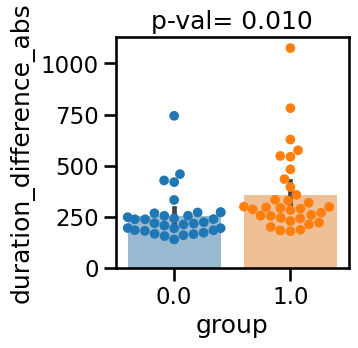

In [116]:
fig, axs = plt.subplots(1, 1, figsize=(3,3))
i = 0
col ='duration_difference_abs'
sns.barplot(tmp.reset_index(), y=col, x='group', hue='group',  ax=axs,legend=False,alpha=0.5)
sns.swarmplot(tmp.reset_index(), y=col, x='group', hue='group',  ax=axs,legend=False,size=7)
stats = pairwise_tests(tmp.reset_index(), dv=col, between='group')
axs.set(title=f'p-val= {stats["p-unc"].values[0]:.3f}')

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:383: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "B"] = B
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new ar

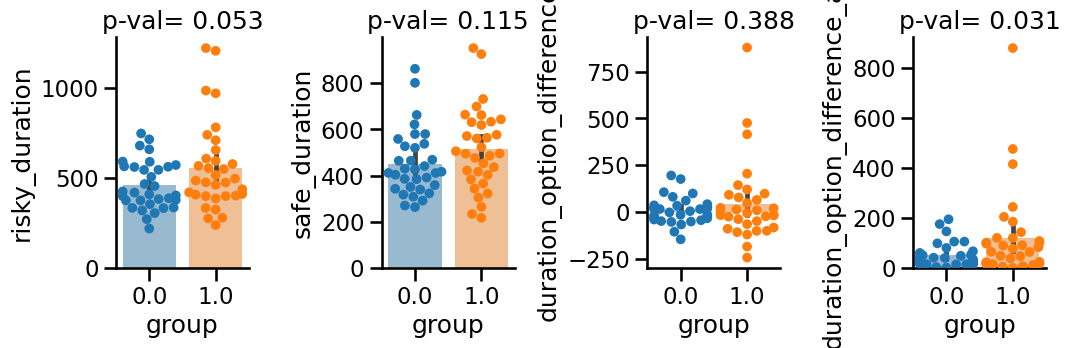

In [ ]:
# difference fixations on risky vs safe?
from pingouin import pairwise_tests
tmp = df.groupby(['subject']).mean(numeric_only=True)
tmp['duration_option_difference_abs'] = tmp['duration_option_difference'].abs()

fig, axs = plt.subplots(1, 4, figsize=(12,3))

for i, col in enumerate(['risky_duration', 'safe_duration', 'duration_option_difference','duration_option_difference_abs']):
    sns.barplot(tmp.reset_index(), y=col, x='group', hue='group',  ax=axs[i],legend=False,alpha=0.5)
    sns.swarmplot(tmp.reset_index(), y=col, x='group', hue='group',  ax=axs[i],legend=False,size=7)
    stats = pairwise_tests(tmp.reset_index(), dv=col, between='group')
    axs[i].set(title=f'p-val= {stats["p-unc"].values[0]:.3f}')

sns.despine()
fig.subplots_adjust(wspace=1)


In [102]:
# non parametric test
from scipy.stats import mannwhitneyu

var = 'duration_option_difference_abs'
stats = mannwhitneyu(tmp[var].loc[tmp['group'] == 0], tmp[var].loc[tmp['group'] == 1])
stats

MannwhitneyuResult(statistic=276.0, pvalue=0.0005882893835555841)

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/pingouin/pairwise.py:383: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sta

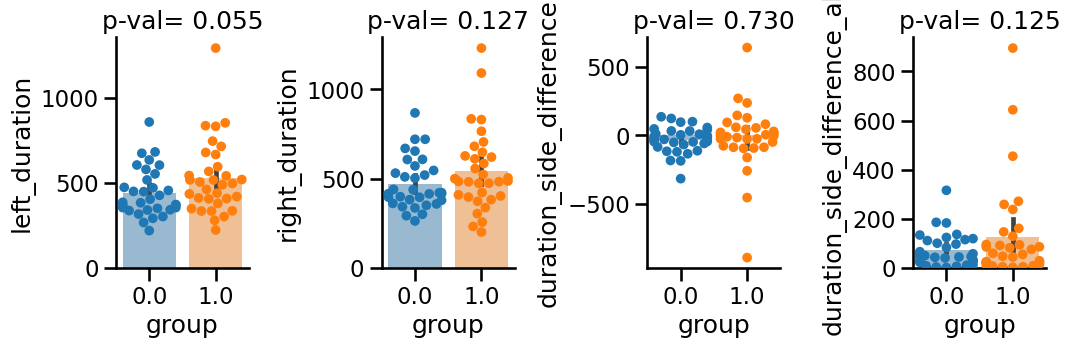

In [101]:
# difference fixations on risky vs safe?
from pingouin import pairwise_tests
tmp = df.groupby(['subject']).mean(numeric_only=True)
tmp['duration_side_difference_abs'] = tmp['duration_side_difference'].abs()

fig, axs = plt.subplots(1, 4, figsize=(12,3))

for i, col in enumerate(['left_duration', 'right_duration', 'duration_side_difference','duration_side_difference_abs']):
    sns.barplot(tmp.reset_index(), y=col, x='group', hue='group',  ax=axs[i],legend=False,alpha=0.5)
    sns.swarmplot(tmp.reset_index(), y=col, x='group', hue='group',  ax=axs[i],legend=False,size=7)
    stats = pairwise_tests(tmp.reset_index(), dv=col, between='group')
    axs[i].set(title=f'p-val= {stats["p-unc"].values[0]:.3f}')

sns.despine()
fig.subplots_adjust(wspace=1)


## Modelling the influences of eyepos on choice

In [112]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

var_1 = 'first_saccade_risky'
var_2 = 'last_saccade_risky'

tmp = df.reset_index().groupby(['subject',var_1, var_2]).mean().reset_index()# 'subject', 
formula = f'chose_risky ~  C(group) + C({var_1}) + C({var_2}) + C(group):C({var_1}) + C(group):C({var_2})'

model = ols(formula, data=tmp.reset_index()).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            chose_risky   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4175
Date:                Wed, 11 Jun 2025   Prob (F-statistic):              0.836
Time:                        16:16:15   Log-Likelihood:                 41.146
No. Observations:                 264   AIC:                            -70.29
Df Residuals:                     258   BIC:                            -48.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_8954/334877359.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject',var_1, var_2]).mean().reset_index()# 'subject',


In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

var_1 = 'last_saccade_risky'

tmp = df.groupby(['subject',var_1]).mean().reset_index()# 'subject', 
formula = f'chose_risky ~  C(group) + C({var_1}) + C(group):C({var_1})'

model = ols(formula, data=tmp.reset_index()).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            chose_risky   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.5144
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.673
Time:                        11:34:50   Log-Likelihood:                 36.298
No. Observations:                 132   AIC:                            -64.60
Df Residuals:                     128   BIC:                            -53.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_8954/2815152743.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject',var_1]).mean().reset_index()# 'subject',


In [128]:
df.columns

Index(['choice', 'n1', 'n2', 'prob1', 'prob2', 'risky_left', 'chose_risky',
       'n_risky', 'n_safe', 'frac', 'log(risky/safe)', 'log(n1)',
       'bin(risky/safe)', 'group', 'trial', 'n_saccades', 'first_saccade',
       'last_saccade', 'left_duration', 'right_duration', 'n_right', 'n_left',
       'p_right', 'p_left', 'p1', 'p2', 'last_saccade_risky',
       'last_saccade_safe', 'first_saccade_risky', 'first_saccade_safe',
       'first_saccade_left', 'last_saccade_left'],
      dtype='object')

In [ ]:
# --> last fixation inlfuences choice most
#  (in positive or negative way - stake size ?!)?

import bambi

var_1 = 'last_saccade_risky'
model_label= 1
target_folder = op.join(bids_folder, 'derivatives', 'pupil')

formula = f'chose_risky ~  C({var_1}) + C({var_1}):n_risky' #C(group):C({var_1})'
model = bambi.Model(formula,family='bernoulli', data=df,link='probit')
res = model.fit(draws=1000, chains=2, tune=1000, target_accept=0.95)

import arviz as az
az.to_netcdf(res, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

# works with behav_fit2_clone in ipython 

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'C(last_saccade_risky)'}>,
        <Axes: title={'center': 'C(last_saccade_risky)'}>],
       [<Axes: title={'center': 'C(last_saccade_risky):n_risky'}>,
        <Axes: title={'center': 'C(last_saccade_risky):n_risky'}>]],
      dtype=object)

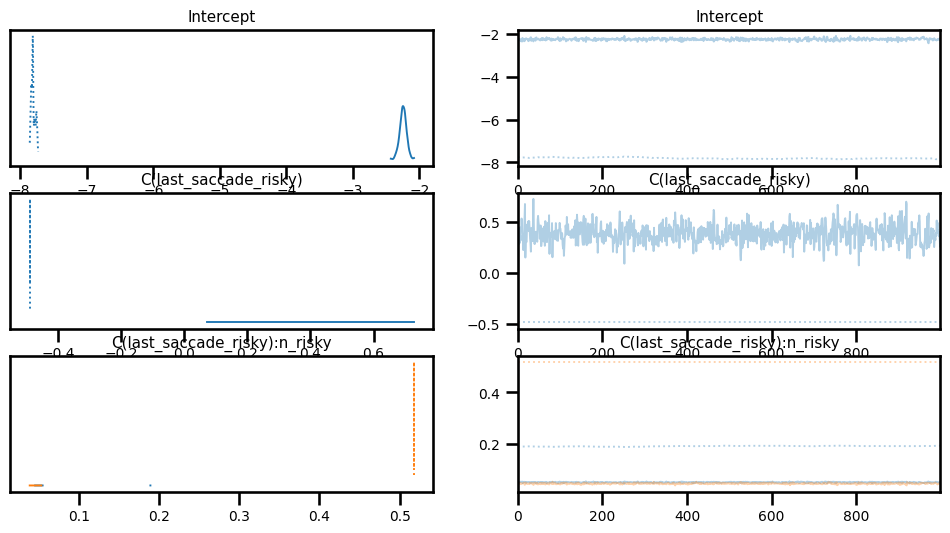

In [104]:
import arviz as az
model_label= 1
target_folder = op.join(bids_folder, 'derivatives', 'pupil')

trace = az.from_netcdf(op.join(target_folder, f'model-{model_label}_trace.netcdf'))

az.plot_trace(trace)

In [117]:
df.columns

Index(['choice', 'n1', 'n2', 'prob1', 'prob2', 'risky_left', 'chose_risky',
       'n_risky', 'n_safe', 'frac', 'log(risky/safe)', 'log(n1)',
       'bin(risky/safe)', 'group', 'trial', 'n_saccades', 'first_saccade',
       'last_saccade', 'left_duration', 'right_duration', 'n_right', 'n_left',
       'p_right', 'p_left', 'p1', 'p2', 'last_saccade_risky',
       'last_saccade_safe', 'first_saccade_risky', 'first_saccade_safe',
       'first_saccade_left', 'last_saccade_left', 'log_risky_safe',
       'risky_duration', 'safe_duration', 'duration_option_difference',
       'duration_side_difference', 'duration_option_difference_abs',
       'duration_side_difference_abs', 'duration_difference_abs'],
      dtype='object')

In [ ]:
model = 2
formula = f'chose_risky ~ 1 + log_risky + log_safe +  (1 + log_risky + log_safe |subject) ' #  log_risky:group - log_safe:group 

# relate beta ratios (b1/b1+b2 - accounting for general size) deviation from 0.5 to subwise gaze_patterns

In [ ]:
model = 3
formula = f'chose_risky ~ 1 + log_risky + log_risky:risky_duration + log_safe + log_safe:risky_duration + (1+ log_risky + log_safe + risky_duration + safe_duration | subject) ' #C(group):C({var_1})'

# Z-score durations within subjects